# Khám phá dữ liệu qua các câu hỏi và câu trả lời


In [1]:
# import những thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# !pip install mapclassify
import mapclassify

In [36]:
# Đọc dữ liệu đã tiền xử lý ở phần trước
df = pd.read_csv('../data/cleaned_dataset.csv')
df.sample(5)

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương tối thiểu,Mức lương tối đa,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
1531,TP.HCM,1.6,Chuyên viên- nhân viên,Không yêu cầu,4,Toàn thời gian cố định,Cao đẳng,1 năm,Bán hàng - Kinh doanh/Bán sỉ - Bán lẻ - Quản l...,Dưới 10 người,1,8.0,15.0,11.5,21.4,39.0,30.2
4103,TP.HCM,2.0,Chuyên gia,Nữ,2,Toàn thời gian cố định,Trung cấp,2 năm,Kế toán/Tài chính - Đầu tư - Chứng Khoán,Trên 300 người,2,8.0,10.0,9.0,22.0,35.0,28.5
2741,TP.HCM,2.0,Chuyên viên- nhân viên,Không yêu cầu,2,Toàn thời gian cố định,Đại học,3 năm,Marketing,10 - 150 người,2,15.0,20.0,17.5,22.0,35.0,28.5
4714,Bình Dương,1.0,Quản lý cấp trung,Không yêu cầu,2,Toàn thời gian cố định,Chứng chỉ,5 năm,Xây dựng,Dưới 10 người,1,7.0,15.0,11.0,23.0,35.0,29.0
393,TP.HCM,1.0,Chuyên viên- nhân viên,Nữ,2,Toàn thời gian cố định,Trung cấp,1 năm,Y tế - Chăm sóc sức khỏe/Hành chính - Thư ký,10 - 150 người,1,6.0,8.0,7.0,22.0,33.4,27.7


## 1. Khám phá dữ liệu

- Các ngành nghề đăng tin tuyển dụng là các ngành nào?

In [37]:
carreer = pd.Series(df['Ngành nghề'].str.split('/').explode().str.strip())
num_carreer = carreer.nunique()
print('Số ngành nghề: ', num_carreer)
carreer_value = pd.DataFrame(carreer.value_counts())
carreer_value.reset_index(inplace=True)
carreer_value.columns = ['Ngành nghề', 'Số lượng']
carreer_value

Số ngành nghề:  53


,Ngành nghề,Số lượng
0,Bán hàng - Kinh doanh,1812
1,Chăm sóc khách hàng,754
2,Kế toán,708
3,Bán sỉ - Bán lẻ - Quản lý cửa hàng,686
4,Hành chính - Thư ký,610
5,Marketing,562
6,Khoa học - Kỹ thuật,469
7,Xây dựng,417
8,Tài chính - Đầu tư - Chứng Khoán,374
9,Kiểm toán,334


- Xét 10 ngành nghề có số lượng công việc tuyển cao nhất

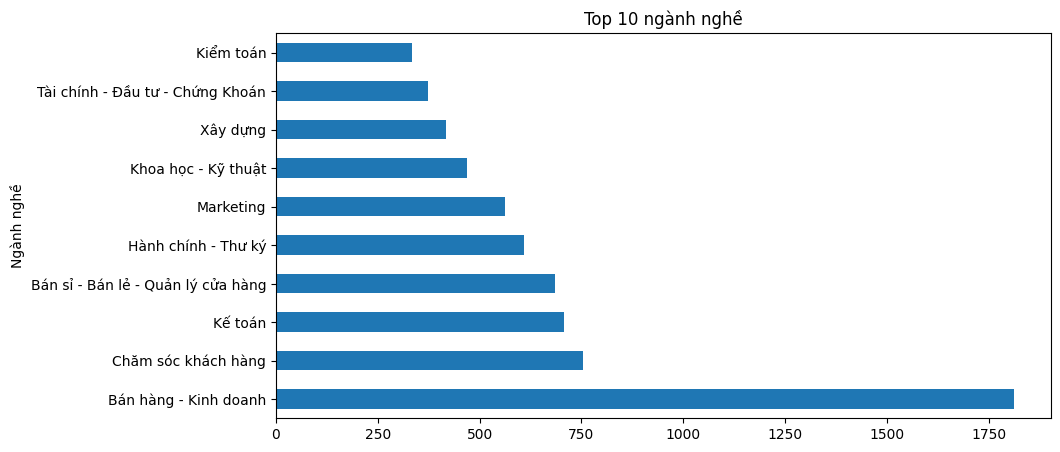

In [5]:
top10_carreer = carreer.value_counts().head(10)
top10_carreer.plot(kind='barh', figsize=(10, 5), title='Top 10 ngành nghề');

- Các công việc này sẽ có yêu cầu bằng cấp như thế nào?

In [6]:
degree_requirements = pd.DataFrame(df['Yêu cầu bằng cấp'].value_counts())
degree_requirements.reset_index(inplace=True)
degree_requirements.columns = ['Yêu cầu bằng cấp', 'Số lượng']
degree_requirements

,Yêu cầu bằng cấp,Số lượng
0,Cao đẳng,1817
1,Đại học,1057
2,Trung cấp,957
3,Không,628
4,Trung học,536
5,Chứng chỉ,64
6,Trên đại học,5


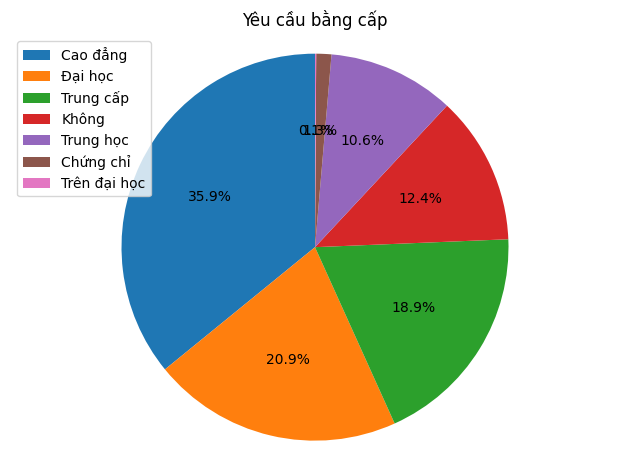

In [7]:
labels = degree_requirements['Yêu cầu bằng cấp']
sizes = degree_requirements['Số lượng']
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yêu cầu bằng cấp')
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

- Các công việc này có yêu cầu về kinh nghiệm làm việc không?

In [8]:
exp_requirements = pd.DataFrame(df['Yêu cầu kinh nghiệm'].value_counts())
exp_requirements.reset_index(inplace=True)
exp_requirements.columns = ['Yêu cầu kinh nghiệm', 'Số lượng']
exp_requirements

,Yêu cầu kinh nghiệm,Số lượng
0,1 năm,1741
1,Chưa có kinh nghiệm,1114
2,2 năm,881
3,Dưới 1 năm,739
4,3 năm,413
5,5 năm,106
6,Hơn 5 năm,44
7,4 năm,26


- Các cấp bậc tuyển là các cấp bậc nào?

In [68]:
level_df = pd.DataFrame(df['Cấp bậc'].value_counts())
level_df.reset_index(inplace=True)
level_df.columns = ['Cấp bậc', 'Số lượng']
level_df

,Cấp bậc,Số lượng
0,Chuyên viên- nhân viên,4318
1,Quản lý nhóm- giám sát,296
2,Quản lý cấp trung,245
3,Cộng tác viên,139
4,Quản lý cấp cao,42
5,Chuyên gia,23
6,Chưa cập nhật,1


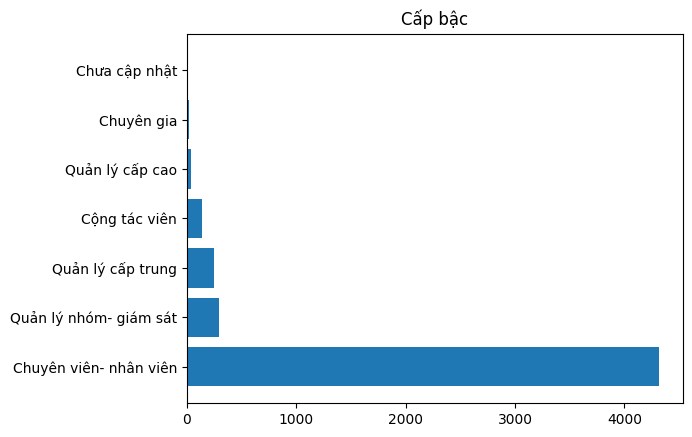

In [10]:
labels = level_df['Cấp bậc']
sizes = level_df['Số lượng']
plt.barh(labels, sizes)
plt.title('Cấp bậc')
plt.show()

- Yêu cầu về giới tính của các công việc

In [11]:
gender_df = pd.DataFrame(df['Yêu cầu giới tính'].value_counts())
gender_df.reset_index(inplace=True)
gender_df.columns = ['Giới tính', 'Số lượng']
gender_df

,Giới tính,Số lượng
0,Không yêu cầu,3296
1,Nam,1097
2,Nữ,671


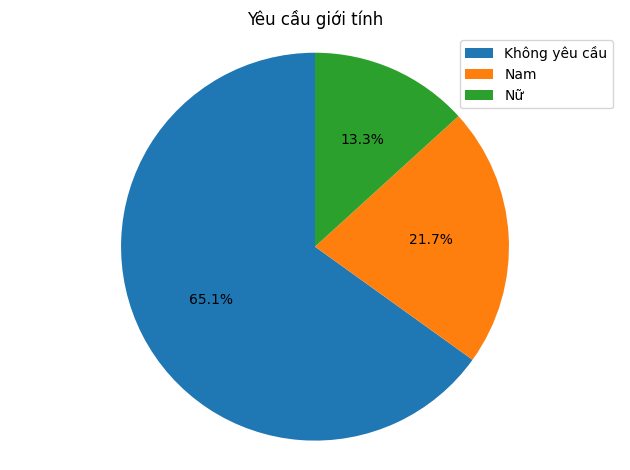

In [12]:
labels = gender_df['Giới tính']
sizes = gender_df['Số lượng']
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yêu cầu giới tính')
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

- Độ tuổi trung bình tuyển nhân sự của các công việc 

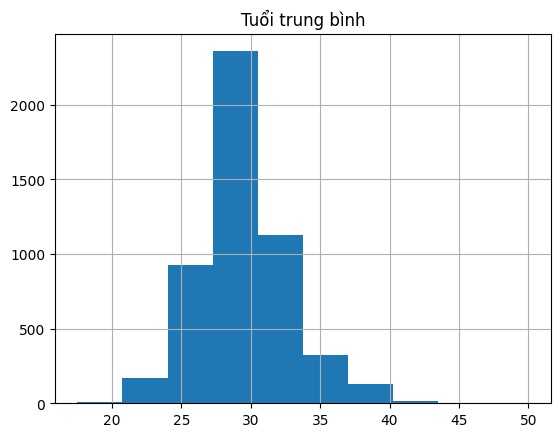

In [13]:
avg_age_df = pd.DataFrame(df['Tuổi trung bình'])
avg_age_df.hist(bins=10)
plt.title('Tuổi trung bình')
plt.show()

In [14]:
area_df = pd.Series(df['Khu vực tuyển']).str.split(',').explode().str.strip()
area_df = pd.DataFrame(area_df.value_counts())
area_df.reset_index(inplace=True)
area_df.columns = ['Khu vực', 'Số lượng']
area_df

,Khu vực,Số lượng
0,TP.HCM,2500
1,Hà Nội,1355
2,Bình Dương,402
3,Đồng Nai,173
4,Long An,157
...,...,...
59,Yên Bái,4
60,Hà Giang,3
61,Nước ngoài,2
62,Bắc Kạn,1


- Xét 10 khu vực có số lượng công việc tuyển nhiều nhất

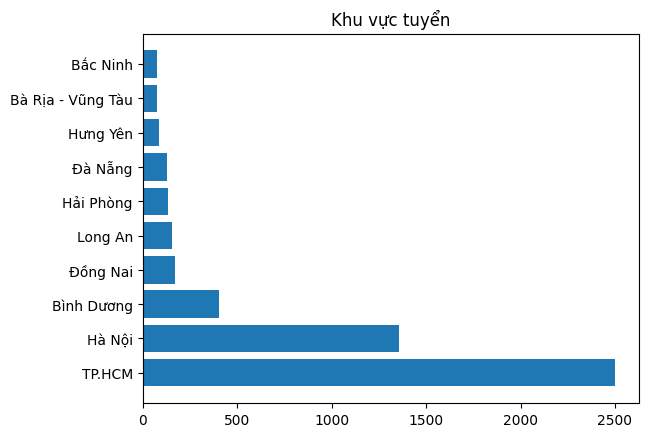

In [15]:
labels = area_df['Khu vực'].head(10)
sizes = area_df['Số lượng'].head(10)
plt.barh(labels, sizes)
plt.title('Khu vực tuyển')
plt.show()

['Kiên Giang', 'Quảng Ninh', 'Bình Phước', 'Bình Thuận', 'Cà Mau', 'Hòa Bình', 'Bình Dương', 'Sóc Trăng', 'Ninh Thuận', 'Đắk Lắk', 'Hưng Yên', 'Lào Cai', 'Long An', 'Phú Thọ', 'Bắc Giang', 'Bắc Ninh', 'Cao Bằng', 'Đăk Nông', 'Hà Nam', 'Tiền Giang', 'Thái Nguyên', 'Hải Dương', 'Tây Ninh', 'Đà Nẵng', 'Thái Bình', 'Ninh Bình', 'Bạc Liêu', 'Đồng Nai', 'Nam Định', 'Trà Vinh', 'Bà Rịa - Vũng Tàu', 'Đồng Tháp', 'Kon Tum', 'Lai Châu', 'Lâm Đồng', 'Gia Lai', 'Lạng Sơn', 'Yên Bái', 'Bắc Kạn', 'Vĩnh Phúc', 'Nghệ An', 'Điện Biên', 'Hậu Giang', 'Vĩnh Long', 'Tuyên Quang', 'Quảng Ngãi', 'An Giang', 'Bình Định', 'Quảng Trị', 'Bến Tre', 'Cần Thơ', 'Hà Giang', 'TP.HCM', 'Hải Phòng', 'Hà Nội', 'Hà Tĩnh', 'Khánh Hòa', 'Quảng Bình', 'Thừa Thiên Huế', 'Thanh Hóa', 'Sơn La', 'Quảng Nam', 'Phú Yên']


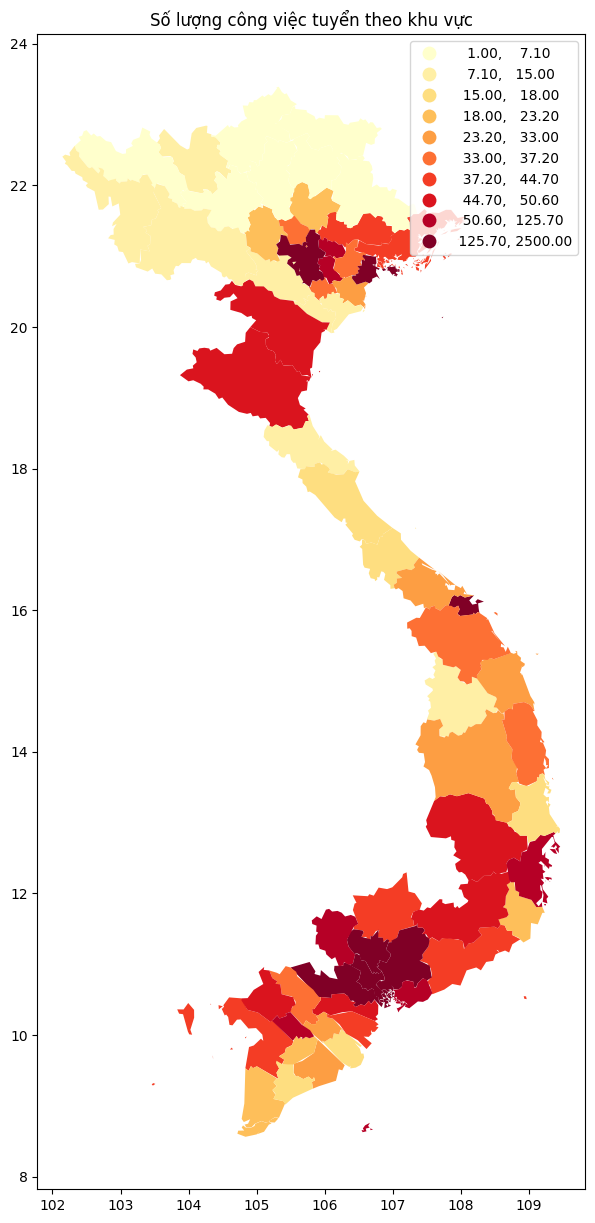

In [16]:
# Đọc bản đồ
vietnam_map = gpd.read_file('../data/vietnam.geojson')
# Chuẩn hóa tên tỉnh thành
vietnam_map = vietnam_map.replace({"Hồ Chí Minh city": "TP.HCM"})
vietnam_map = vietnam_map.replace({"Thừa Thiên - Huế": "Thừa Thiên Huế"})
print(list(vietnam_map['name']))
# Merge dữ liệu
merged = vietnam_map.set_index('name').join(area_df.set_index('Khu vực'))

# Vẽ biểu đồ
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 15)
merged.plot(column='Số lượng', ax=ax, legend=True, cmap='YlOrRd', scheme='quantiles', k=10)
plt.title('Số lượng công việc tuyển theo khu vực')
plt.show()

## 2. Đặt câu hỏi và trả lời

**Câu hỏi:** Ngành nghề nào có nhiều công việc với mức lương cao nhất?

- Bước 1: Lọc ra các công việc có thu nhập cao (ngưỡng là phân vị 75% mức lương trung bình)

In [116]:
upper_quartile = df['Mức lương trung bình'].quantile(0.75)
print(f"Giá trị ngưỡng: {upper_quartile} triệu")
df_highsalary = df[df['Mức lương trung bình'] >= upper_quartile]

Giá trị ngưỡng: 15.5 triệu


- Bước 2: Tính tỉ lệ công việc lương cao ở các ngành nghề, vẽ biểu đồ top 10

C:\Users\Asus\AppData\Local\Temp\ipykernel_9924\2524767021.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_carreer['Ngành nghề'].head(10), rotation='vertical')


Text(0.5, 1.0, 'Top 10 ngành nghề có tỉ lệ công việc lương cao')

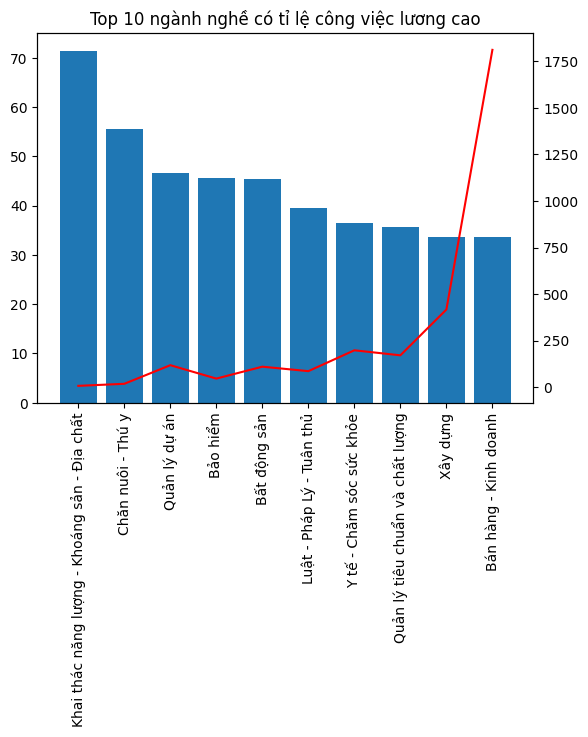

In [117]:
carreer_highsalary = pd.Series(df_highsalary['Ngành nghề'].str.split('/').explode().str.strip())
df_carreer = pd.DataFrame(carreer_highsalary.value_counts())
df_carreer = pd.merge(df_carreer, carreer_value, on='Ngành nghề')

df_carreer['Tỉ lệ công việc lương cao'] = df_carreer['count'] / df_carreer['Số lượng'] *100
df_carreer.drop(['count'], axis=1, inplace=True)
df_carreer = df_carreer.sort_values(by='Tỉ lệ công việc lương cao', ascending=False)
df_carreer.reset_index(inplace=True)
df_carreer.drop(columns=['index'], inplace=True)

fig, ax = plt.subplots()
ax.bar(df_carreer['Ngành nghề'].head(10), df_carreer['Tỉ lệ công việc lương cao'].head(10))
ax2 = ax.twinx()
ax2.plot(df_carreer['Ngành nghề'].head(10), df_carreer['Số lượng'].head(10), color = 'r')
ax.set_xticklabels(df_carreer['Ngành nghề'].head(10), rotation='vertical')
plt.title('Top 10 ngành nghề có tỉ lệ công việc lương cao')


Từ biểu đồ trên, có thể thấy trừ Bán hàng - Kinh doanh thì các ngành khác đều có mức lương cao nhưng có nhu cầu tuyển dụng ít